# DataSet - 1

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [31]:
df = load_breast_cancer()
cancer = pd.DataFrame(data=df.data, columns=df.feature_names)
#cancer['target'] = df.target

In [32]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer, df.target, test_size=0.3, random_state=1)
logit = LogisticRegression()

In [34]:
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = logit.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9532163742690059

In [36]:
logit.classes_

array([0, 1])

In [37]:
logit.coef_.shape

(1, 30)

In [38]:
logit.intercept_

array([0.36608704])

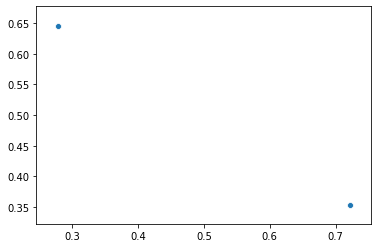

In [39]:
sns.scatterplot(x=logit.predict_proba(X_test)[0], y=logit.predict_proba(X_test)[1])

In [40]:
logit.coef_.shape

(1, 30)

In [41]:
# PLugin input(i.e each row of dataset) and Coefficent from the model along with intercept to get the linear equation as decision boundary f(x) = m1(x1) + m2(x2) + .... + intercept
def Linear_equation(x):
    input_ = np.array(x).reshape(-1, 1)
    return np.dot(logit.coef_, input_) + logit.intercept_

In [42]:
# Define sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [43]:
result = cancer.apply(Linear_equation, axis=1)

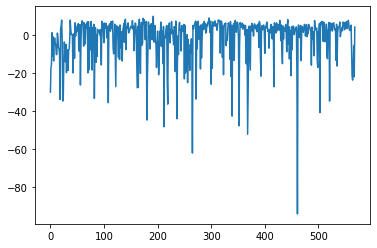

In [44]:
plt.plot(np.array(result))

In [45]:
# Calculate the link function
sig_data = [float(sigmoid(x)) for x in np.array(result)]

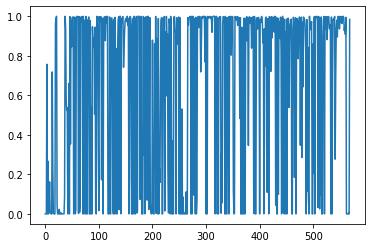

In [46]:
plt.plot(np.array(sig_data))

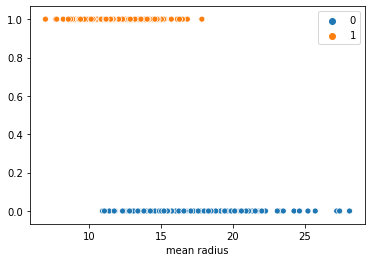

In [47]:
sns.scatterplot(x=cancer['mean radius'], y=df.target, hue=df.target)

# DataSet - 2

In [48]:
x = np.arange(10)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

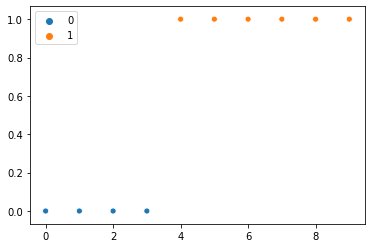

In [49]:
sns.scatterplot(x=x, y=y, hue=y)

In [50]:
logit_s = LogisticRegression() 
logit_s.fit(x.reshape(-1, 1), y)

d = np.arange(0, 4)
y_pred = logit_s.predict(d.reshape(-1, 1))

In [51]:
logit_s.coef_

array([[0.51491375]])

In [52]:
logit_s.intercept_

array([-1.04608067])

In [53]:
data = logit_s.coef_*x.reshape(-1, 1) + logit_s.intercept_

In [54]:
data.shape

(10, 1)

In [55]:
logit_s.predict_proba(x.reshape(-1, 1))

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

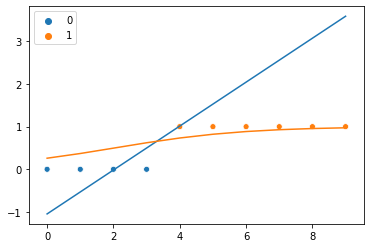

In [56]:
sig_data = [sigmoid(x) for x in data]
fig, ax = plt.subplots()
ax.plot(data)
sns.scatterplot(x=x, y=y, hue=y, ax=ax)
ax.plot(np.array(sig_data))

In [57]:
y_pred

array([0, 0, 0, 1])

# DataSet - 3

In [58]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [59]:
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
logistic_regression.intercept_

array([-0.64720293])

In [61]:
logistic_regression.coef_

array([[-0.00942552,  1.09197736,  1.03956742]])

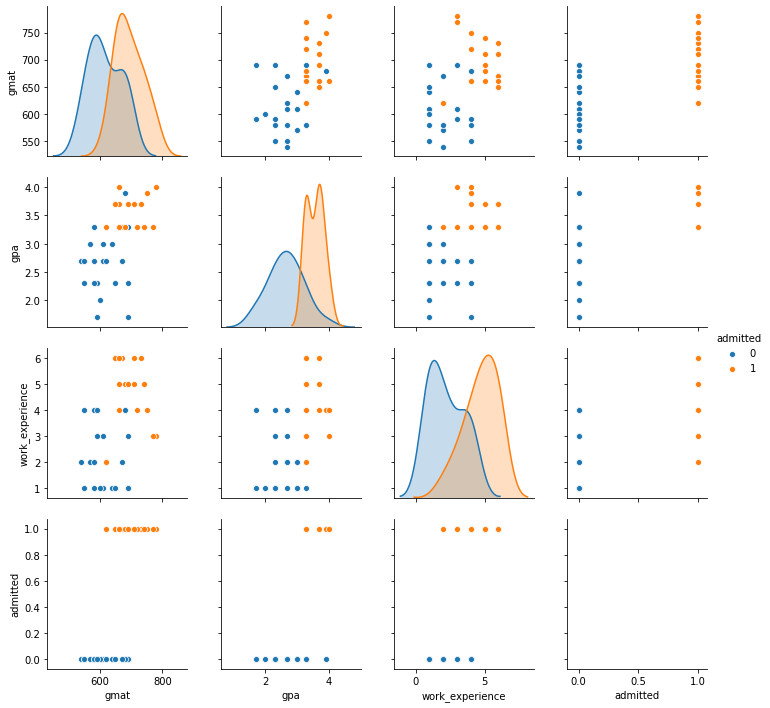

In [62]:
sns.pairplot(df, hue='admitted')

In [63]:
def Linear_equation_3(x, esti):
    input_ = np.array(x[0:-1]).reshape(-1, 1)
    return np.dot(esti.coef_[0][0:-1], input_) + esti.intercept_

In [64]:
res = X.apply(Linear_equation_3, args=(logistic_regression,), axis=1)

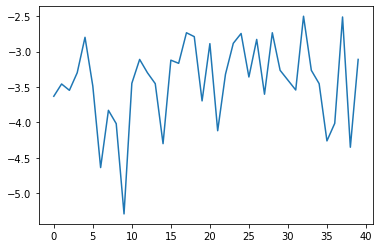

In [65]:
plt.plot(res)

In [66]:
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [67]:
x1 = np.array(df.gmat)
x2 = np.array(df.gpa)

In [68]:
reg = LogisticRegression(fit_intercept=False)
reg.fit(df.iloc[:, 0:-2], df.admitted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
reg.coef_

array([[-0.00793333,  1.66800185]])

In [70]:
reg.coef_.shape

(1, 2)

In [71]:
reg.intercept_

0.0

In [72]:
def Linear_equation_2(x):    
    input_ = np.array(x).reshape(2,1)
    return np.dot(reg.coef_, input_) + reg.intercept_

In [73]:
def h(x):
    input_ = np.array(x).reshape(2,1)
    return 1/(1 + np.exp(-1 * np.dot(reg.coef_, input_)))

In [74]:
res = df.iloc[:, 0:-2].apply(h, axis=1)

In [75]:
res

0      [[0.6186942721431252]]
1      [[0.6353433835686756]]
2      [[0.5076014614848128]]
3      [[0.6315663408040479]]
4      [[0.7522302555167936]]
5      [[0.5939396006872146]]
6     [[0.16279275935023338]]
7     [[0.44828764564003637]]
8      [[0.4094454500970331]]
9     [[0.06670790424741284]]
10     [[0.4168479342347567]]
11     [[0.6676574279850325]]
12     [[0.6315663408040479]]
13     [[0.5274078719927007]]
14     [[0.3533700816712175]]
15     [[0.5410757339125454]]
16    [[0.47558777925482026]]
17     [[0.7339862198816753]]
18     [[0.5546820699256668]]
19    [[0.30063820547049996]]
20     [[0.6423874092409161]]
21     [[0.1940361374080849]]
22    [[0.37123380373182613]]
23     [[0.5350109414696368]]
24     [[0.6182217505989298]]
25     [[0.5471283819122441]]
26     [[0.7182118105539695]]
27    [[0.31757744737918564]]
28     [[0.7339862198816753]]
29     [[0.5667020537776332]]
30    [[0.48167674647457925]]
31     [[0.3976994989605023]]
32     [[0.8078359224867094]]
33     [[0

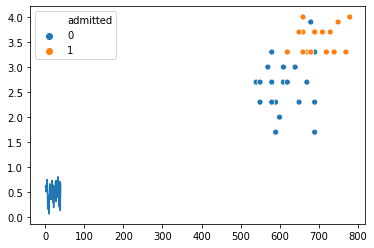

In [76]:
fig, ax = plt.subplots()
sns.scatterplot(x1, x2, df.admitted, ax=ax)
ax.plot(res)

In [77]:
temp = reg.predict(df.iloc[:, 0:-2])

In [78]:
fig, ax1 = plt.subplots()
#sns.scatterplot(x1, x2, df.admitted, ax=ax1)
sns.scatterplot(temp[:,0], temp[:,1], ax=ax1)

IndexError: too many indices for array

In [189]:
x1 = np.array(df.iloc[:,0])
x2 = np.array(df.iloc[:,1])

xx1, xx2 = np.meshgrid(x1, x2)
grid = np.c_[xx1.ravel(), xx2.ravel()]
preds = reg.predict_proba(df.iloc[:, 0:-2])[:, 1]

In [190]:
preds = preds.reshape(5, 8)

In [191]:
preds.shape

(5, 8)

In [192]:
f, ax = plt.subplots(figsize=(10, 5))
ax.contour(xx1, xx2, preds, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

TypeError: Shape of x does not match that of z: found (40, 40) instead of (5, 8).